<a href="https://colab.research.google.com/github/joaopedro169/Processo-seletivo-Daedalus/blob/main/Questao_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --id 1EgvzTNEWTXvegURlmJAt8OXOtrKAlQEb --output marcelinho.jpg

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EgvzTNEWTXvegURlmJAt8OXOtrKAlQEb
To: /content/marcelinho.jpg
100% 37.5k/37.5k [00:00<00:00, 37.6MB/s]


In [ ]:
!gdown --id 1Mrx0OKnBFteOw1q8IZy-n8x9q8cxZwhT --output post-processed.zip

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Mrx0OKnBFteOw1q8IZy-n8x9q8cxZwhT
To: /content/post-processed.zip
100% 71.4M/71.4M [00:01<00:00, 69.2MB/s]


In [ ]:
!gdown --id 1RcLasSJj-XMke5Fj33adiaHWbbl-9ihW --output marcelinho2.jpg

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RcLasSJj-XMke5Fj33adiaHWbbl-9ihW
To: /content/marcelinho2.jpg
100% 87.6k/87.6k [00:00<00:00, 61.5MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import shutil
import numpy as np
import pandas as pd
import os
import zipfile

In [ ]:
with zipfile.ZipFile('/content/post-processed.zip', 'r') as zip_ref:
    zip_ref.extractall('.')  

In [ ]:
data_dir = '/content/post-processed'

batch_size = 32
img_height = 112
img_width = 112

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 12000 files belonging to 2996 classes.
Using 9600 files for training.
Found 12000 files belonging to 2996 classes.
Using 2400 files for validation.


In [ ]:
class_names = train_ds.class_names

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import numpy as np

input_shape = (112, 112, 3)

base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2996, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

database = {}
num_classes = 2996

for subdir, _, files in os.walk(data_dir):
    for file in files:
       
        img_path = os.path.join(subdir, file)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = preprocess_input(img_array)
        
        
        preds = model.predict(np.array([img_array]))
        preds = preds.reshape(-1)  
        
        
        if subdir not in database:
            database[subdir] = []
        database[subdir].append(preds)

for subdir in database:
    features = np.array(database[subdir])
    features = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), axis=1, arr=features)
    database[subdir] = features


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step


In [ ]:

new_image_path = 'marcelinho.jpg'
new_img_dir = '/content/'
new_img = tf.keras.preprocessing.image.load_img(
  os.path.join(new_img_dir, new_image_path),
  target_size=(img_height, img_width)
)

In [ ]:
new_img_array = tf.keras.preprocessing.image.img_to_array(new_img)
new_img_array = tf.expand_dims(new_img_array, 0) 
new_features = model.predict(normalization_layer(new_img_array)).flatten() 
database[new_image_path] = new_features

1/1 [==============================] - 0s 24ms/step


In [ ]:

img_path = 'marcelinho2.jpg'
img = tf.keras.preprocessing.image.load_img(
  os.path.join(new_img_dir, img_path),
  target_size=(img_height, img_width)
)

In [ ]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 
features = model.predict(normalization_layer(img_array)).flatten() 
distances = []
for name, descriptor in database.items():
  distance = np.linalg.norm(features - descriptor)
  distances.append((name, distance))
distances = sorted(distances, key=lambda x: x[1]) 

print('A pessoa mais similar é:', distances[0][0]) 


1/1 [==============================] - 0s 33ms/step
A pessoa mais similar é: marcelinho.jpg


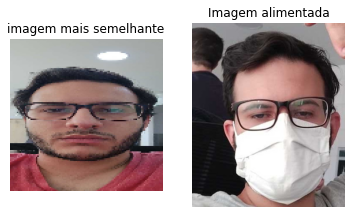

In [ ]:
import matplotlib.pyplot as plt
import cv2
# Load the second image
img2 = cv2.imread(img_path)


most_similar_name = distances[0][0]

# Load and preprocess the most similar image
most_similar_path = os.path.join('/content/', most_similar_name)
most_similar_img = cv2.imread(most_similar_path)
most_similar_img = cv2.cvtColor(most_similar_img, cv2.COLOR_BGR2RGB)
most_similar_img = cv2.resize(most_similar_img, (112, 112))
fig, axs = plt.subplots(1, 2)

axs[0].imshow(most_similar_img)
axs[0].axis('off')
axs[0].set_title('imagem mais semelhante')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title('Imagem alimentada')
plt.show()
